In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
#pd.set_option('display.max_rows', 500)

In [4]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
demo=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
passids=test_df['PassengerId']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
demo.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
X=df.iloc[:,2:12]
y=df.Survived

In [10]:
X['Cabin']=X['Cabin'].replace(np.nan, 'No_Cabin')
test_df['Cabin']=test_df['Cabin'].replace(np.nan, 'No_Cabin')

In [11]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
214,1106,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,No_Cabin,S
15,907,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,No_Cabin,C
216,1108,3,"Mahon, Miss. Bridget Delia",female,NaN,0,0,330924,7.8792,No_Cabin,Q
311,1203,3,"Vartanian, Mr. David",male,22.0,0,0,2658,7.2250,No_Cabin,C
70,962,3,"Mulvihill, Miss. Bertha E",female,24.0,0,0,382653,7.7500,No_Cabin,Q


In [12]:
X.drop(columns=['Ticket'], inplace=True)
test_df.drop(columns=['Ticket', 'PassengerId'], inplace=True)

In [13]:
#pclass=pd.get_dummies(X['Pclass'].replace(2, 'Pclass_2').replace(3, 'Pclass_3'), drop_first=True, dtype=int)
#X=pd.concat([X, pclass], axis=1)

X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,No_Cabin,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,No_Cabin,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,No_Cabin,S


In [14]:
#pclass2=pd.get_dummies(test_df['Pclass'].replace(2, 'Pclass_2').replace(3, 'Pclass_3'), drop_first=True, dtype=int)
#test_df=pd.concat([test_df, pclass2], axis=1)

test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,No_Cabin,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,No_Cabin,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,No_Cabin,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,No_Cabin,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,No_Cabin,S


In [15]:
def transform(X):
    emb=pd.get_dummies(X['Embarked'].replace('Q', 'Q_emb').replace('S', 'S_emb').replace('C', 'C_emb'), dtype=int, drop_first=True)
    sex=pd.get_dummies(X['Sex'], dtype=int, drop_first=True)
    temp=pd.concat([emb,sex],axis=1)
    X=pd.concat([X,temp], axis=1)
    X.drop(columns=['Sex', 'Embarked'], inplace=True)
    return X

In [16]:
X=transform(X)
test_df=transform(test_df)

In [17]:
X_copy=X.copy()
X_copy

,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Q_emb,S_emb,male
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,No_Cabin,0,1,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C85,0,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,No_Cabin,0,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123,0,1,0
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,No_Cabin,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,No_Cabin,0,1,1
887,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,B42,0,1,0
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,23.4500,No_Cabin,0,1,0
889,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,C148,0,0,1


In [18]:
def title(df):
    title=[]
    for i in range(len(df['Name'])):
        for j in range(len(df['Name'].astype(str)[i].split())):
            if ',' in df['Name'].astype(str)[i].split()[j]:
                title.append(df['Name'].astype(str)[i].split()[j+1])
                break
    title=pd.DataFrame({'title': title})
    df=pd.concat([df,title], axis=1)
    df.drop('Name', axis=1, inplace=True)
    return df

In [19]:
X=title(X)
test_df=title(test_df)

In [20]:
len(X_copy['Name'])

891

In [21]:
df[X['title'].isnull()]['Name']

Series([], Name: Name, dtype: object)

In [22]:
def age(X):
    median_age=X['Age'].quantile(0.5)
    X['Age']=X['Age'].fillna(median_age)
    mean_fare=X['Fare'].mean()
    X['Fare']=X['Fare'].fillna(mean_fare)
    return X

In [23]:
X=age(X)
test_df=age(test_df)

In [24]:
total=pd.DataFrame(X['title'].value_counts())
total

,count
title,
Mr.,517
Miss.,182
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Mlle.,2
Major.,2
Col.,2


In [25]:
survive=X[df['Survived']==1]['title'].value_counts()
survive=pd.DataFrame(survive)
survive

,count
title,
Miss.,127
Mrs.,99
Mr.,81
Master.,23
Dr.,3
Mlle.,2
Mme.,1
Ms.,1
Major.,1


In [26]:
alive=pd.DataFrame(X['title'].value_counts()-X[df['Survived']==0]['title'].value_counts())

alive=alive.to_numpy()
alive

array([[  0.],
       [  1.],
       [  0.],
       [  3.],
       [  0.],
       [ nan],
       [  1.],
       [ 23.],
       [127.],
       [ nan],
       [ nan],
       [ 81.],
       [ 99.],
       [ nan],
       [  0.],
       [ nan],
       [ nan]])

In [27]:
temporary=[]
for i in range(len(alive)):
    if pd.isnull(alive[i]):
        temporary.append(i)

In [28]:
titlenames=list((X['title'].value_counts()-X[df['Survived']==0]['title'].value_counts()).index)
titlenames.append('Dona.')

In [29]:
list(titlenames[0])

['C', 'a', 'p', 't', '.']

In [30]:
titlenames=pd.DataFrame(titlenames)

In [31]:
male_titles = ["Capt.", "Col.", "Don.", "Jonkheer.", "Major.", "Master.", "Mr.", "Sir."]
female_titles = ["Lady.", "Miss.", "Mlle.", "Mme.", "Mrs.", "Ms.", "Dona."]
gender_neutral_titles = ["Dr.", "Rev.", "the"]

In [32]:
test_df['title'].value_counts()

title
Mr.        240
Miss.       78
Mrs.        72
Master.     21
Col.         2
Rev.         2
Ms.          1
Dr.          1
Dona.        1
Name: count, dtype: int64

In [33]:
def title_trans(X):
            
    dum=pd.get_dummies(X['title'].replace(gender_neutral_titles, 'gender_neutral_titles').replace(male_titles, 'male_titles').replace(female_titles, 'female_titles'), dtype=int)
    X=pd.concat([X,dum], axis=1)

    X.drop('title', axis=1, inplace=True)
    return X

In [34]:
X=title_trans(X)
test_df=title_trans(test_df)

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pclass                 418 non-null    int64  
 1   Age                    418 non-null    float64
 2   SibSp                  418 non-null    int64  
 3   Parch                  418 non-null    int64  
 4   Fare                   418 non-null    float64
 5   Cabin                  418 non-null    object 
 6   Q_emb                  418 non-null    int64  
 7   S_emb                  418 non-null    int64  
 8   male                   418 non-null    int64  
 9   female_titles          418 non-null    int64  
 10  gender_neutral_titles  418 non-null    int64  
 11  male_titles            418 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 39.3+ KB


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pclass                 891 non-null    int64  
 1   Age                    891 non-null    float64
 2   SibSp                  891 non-null    int64  
 3   Parch                  891 non-null    int64  
 4   Fare                   891 non-null    float64
 5   Cabin                  891 non-null    object 
 6   Q_emb                  891 non-null    int64  
 7   S_emb                  891 non-null    int64  
 8   male                   891 non-null    int64  
 9   female_titles          891 non-null    int64  
 10  gender_neutral_titles  891 non-null    int64  
 11  male_titles            891 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 83.7+ KB


In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pclass                 891 non-null    int64  
 1   Age                    891 non-null    float64
 2   SibSp                  891 non-null    int64  
 3   Parch                  891 non-null    int64  
 4   Fare                   891 non-null    float64
 5   Cabin                  891 non-null    object 
 6   Q_emb                  891 non-null    int64  
 7   S_emb                  891 non-null    int64  
 8   male                   891 non-null    int64  
 9   female_titles          891 non-null    int64  
 10  gender_neutral_titles  891 non-null    int64  
 11  male_titles            891 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 83.7+ KB


In [38]:
import seaborn as sns

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pclass                 891 non-null    int64  
 1   Age                    891 non-null    float64
 2   SibSp                  891 non-null    int64  
 3   Parch                  891 non-null    int64  
 4   Fare                   891 non-null    float64
 5   Cabin                  891 non-null    object 
 6   Q_emb                  891 non-null    int64  
 7   S_emb                  891 non-null    int64  
 8   male                   891 non-null    int64  
 9   female_titles          891 non-null    int64  
 10  gender_neutral_titles  891 non-null    int64  
 11  male_titles            891 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 83.7+ KB


In [40]:
def fam(X):
    X['Family_size']=X['SibSp']+X['Parch']+1
    X['Alone']=np.where(X['Family_size']==1, 1, 0)
    X.drop(columns=['SibSp', 'Parch'], inplace=True)
    return X

In [41]:
X=fam(X)
test_df=fam(test_df)

In [42]:
X.head()

,Pclass,Age,Fare,Cabin,Q_emb,S_emb,male,female_titles,gender_neutral_titles,male_titles,Family_size,Alone
0,3,22.0,7.2500,No_Cabin,0,1,1,0,0,1,2,0
1,1,38.0,71.2833,C85,0,0,0,1,0,0,2,0
2,3,26.0,7.9250,No_Cabin,0,1,0,1,0,0,1,1
3,1,35.0,53.1000,C123,0,1,0,1,0,0,2,0
4,3,35.0,8.0500,No_Cabin,0,1,1,0,0,1,1,1


In [43]:
X['Fare'].quantile(0.017)

4.140875000000001

In [44]:
import matplotlib.pyplot as plt

In [45]:
#X['Fare']=X['Fare'].replace(0, X['Fare'].quantile(0.017))
#test_df['Fare']=test_df['Fare'].replace(0, test_df['Fare'].quantile(0.017))

In [46]:
X

,Pclass,Age,Fare,Cabin,Q_emb,S_emb,male,female_titles,gender_neutral_titles,male_titles,Family_size,Alone
0,3,22.0,7.2500,No_Cabin,0,1,1,0,0,1,2,0
1,1,38.0,71.2833,C85,0,0,0,1,0,0,2,0
2,3,26.0,7.9250,No_Cabin,0,1,0,1,0,0,1,1
3,1,35.0,53.1000,C123,0,1,0,1,0,0,2,0
4,3,35.0,8.0500,No_Cabin,0,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,13.0000,No_Cabin,0,1,1,0,1,0,1,1
887,1,19.0,30.0000,B42,0,1,0,1,0,0,1,1
888,3,28.0,23.4500,No_Cabin,0,1,0,1,0,0,4,0
889,1,26.0,30.0000,C148,0,0,1,0,0,1,1,1


In [47]:
X['Fare']=np.where(X['Fare']<7, 7, X['Fare'])
test_df['Fare']=np.where(test_df['Fare']<=7, 7, test_df['Fare'])

In [48]:
X

,Pclass,Age,Fare,Cabin,Q_emb,S_emb,male,female_titles,gender_neutral_titles,male_titles,Family_size,Alone
0,3,22.0,7.2500,No_Cabin,0,1,1,0,0,1,2,0
1,1,38.0,71.2833,C85,0,0,0,1,0,0,2,0
2,3,26.0,7.9250,No_Cabin,0,1,0,1,0,0,1,1
3,1,35.0,53.1000,C123,0,1,0,1,0,0,2,0
4,3,35.0,8.0500,No_Cabin,0,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,13.0000,No_Cabin,0,1,1,0,1,0,1,1
887,1,19.0,30.0000,B42,0,1,0,1,0,0,1,1
888,3,28.0,23.4500,No_Cabin,0,1,0,1,0,0,4,0
889,1,26.0,30.0000,C148,0,0,1,0,0,1,1,1


In [49]:
X['Fare']=np.where(X['Fare']>263, 263, X['Fare'])

In [50]:
X['Fare']=np.log(X['Fare'])
test_df['Fare']=np.log(test_df['Fare'])

In [51]:
X['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

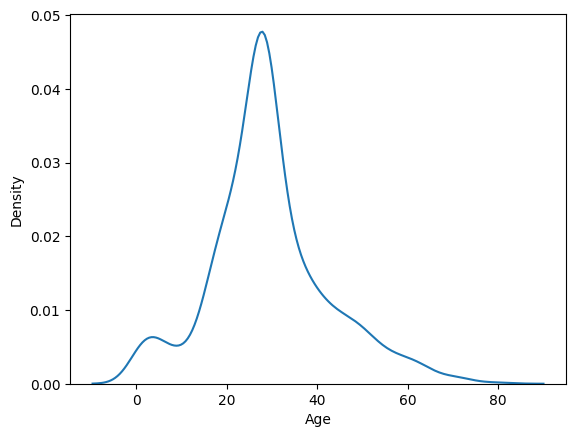

In [52]:
sns.kdeplot(X['Age'])

In [53]:
X['Age'].skew()

0.5102446555756495

In [54]:
mini=X['Age'].quantile(0.25)
maxi=X['Age'].quantile(0.75)
iqr=maxi-mini
X['Age']=np.where(X['Age']>=55, 55, X['Age'])

In [55]:
X["Age"].describe()

count    891.000000
mean      29.031616
std       12.192336
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       55.000000
Name: Age, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

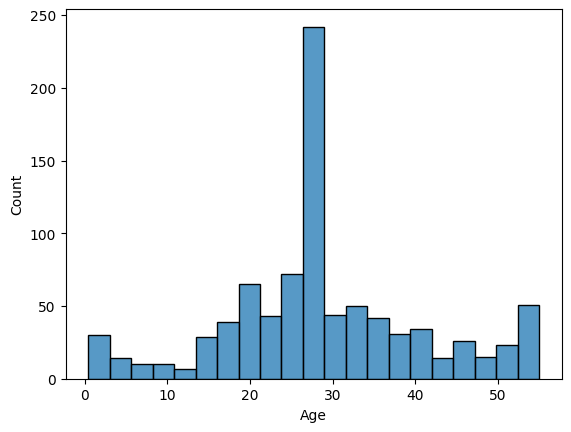

In [56]:
sns.histplot(X['Age'])

In [57]:
#X['Age']=np.log(X['Age'])
#test_df['Age']=np.log(test_df['Age'])

In [58]:
pd.set_option('display.max_rows', 500)

In [59]:
def cab_trans(X):
    cabins=[]
    tot=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T']
    for i in range(len(X)):
        for j in range(1):
            cabins.append(X['Cabin'][i][j])
    for i in cabins:
        if i in tot:
            tot.remove(i)
    cabins=pd.DataFrame({'Cabin_name': cabins})
    dummies=pd.get_dummies(cabins['Cabin_name'], dtype=int)

    X=pd.concat([X, dummies], axis=1)
    for i in tot:
        new=pd.DataFrame({i: np.zeros(len(X), dtype=int)})
        X=pd.concat([X, new], axis=1)
    X.drop('Cabin', axis=1, inplace=True)
    return X

In [60]:
X=cab_trans(X)
test_df=cab_trans(test_df)

In [61]:
X.shape

(891, 20)

In [62]:
test_df.head()

,Pclass,Age,Fare,Q_emb,S_emb,male,female_titles,gender_neutral_titles,male_titles,Family_size,Alone,A,B,C,D,E,F,G,N,T
0,3,34.5,2.057860,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0
1,3,47.0,1.945910,0,1,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0
2,2,62.0,2.270836,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0
3,3,27.0,2.159003,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0
4,3,22.0,2.508582,0,1,0,1,0,0,3,0,0,0,0,0,0,0,0,1,0


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

In [64]:
#X.drop(columns=['gender_neutral_titles'], inplace=True)
#test_df.drop(columns=['gender_neutral_titles'], inplace=True)

In [65]:
X.head()

,Pclass,Age,Fare,Q_emb,S_emb,male,female_titles,gender_neutral_titles,male_titles,Family_size,Alone,A,B,C,D,E,F,G,N,T
0,3,22.0,1.981001,0,1,1,0,0,1,2,0,0,0,0,0,0,0,0,1,0
1,1,38.0,4.266662,0,0,0,1,0,0,2,0,0,0,1,0,0,0,0,0,0
2,3,26.0,2.070022,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
3,1,35.0,3.972177,0,1,0,1,0,0,2,0,0,0,1,0,0,0,0,0,0
4,3,35.0,2.085672,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 298 to 102
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pclass                 668 non-null    int64  
 1   Age                    668 non-null    float64
 2   Fare                   668 non-null    float64
 3   Q_emb                  668 non-null    int64  
 4   S_emb                  668 non-null    int64  
 5   male                   668 non-null    int64  
 6   female_titles          668 non-null    int64  
 7   gender_neutral_titles  668 non-null    int64  
 8   male_titles            668 non-null    int64  
 9   Family_size            668 non-null    int64  
 10  Alone                  668 non-null    int64  
 11  A                      668 non-null    int64  
 12  B                      668 non-null    int64  
 13  C                      668 non-null    int64  
 14  D                      668 non-null    int64  
 15  E        

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
test_df=scaler.transform(test_df)

In [69]:
X_test

array([[ 0.80934914, -0.06984104, -0.20413744, ..., -0.06716605,
         0.53580832, -0.03872015],
       [-0.40558395,  0.17406222, -0.60625853, ..., -0.06716605,
         0.53580832, -0.03872015],
       [ 0.80934914, -0.72024972, -0.90963534, ..., -0.06716605,
         0.53580832, -0.03872015],
       ...,
       [ 0.80934914, -0.06984104, -0.91361564, ..., -0.06716605,
         0.53580832, -0.03872015],
       [-0.40558395, -0.39504538, -0.37596618, ..., -0.06716605,
         0.53580832, -0.03872015],
       [ 0.80934914, -0.88285189,  0.09993404, ..., -0.06716605,
         0.53580832, -0.03872015]])

In [70]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
model=XGBClassifier(learning_rate=0.05)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_pred)
score*100

82.51121076233184

In [72]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

In [73]:
test_test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [74]:
X.head()

,Pclass,Age,Fare,Q_emb,S_emb,male,female_titles,gender_neutral_titles,male_titles,Family_size,Alone,A,B,C,D,E,F,G,N,T
0,3,22.0,1.981001,0,1,1,0,0,1,2,0,0,0,0,0,0,0,0,1,0
1,1,38.0,4.266662,0,0,0,1,0,0,2,0,0,0,1,0,0,0,0,0,0
2,3,26.0,2.070022,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
3,1,35.0,3.972177,0,1,0,1,0,0,2,0,0,0,1,0,0,0,0,0,0
4,3,35.0,2.085672,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0


In [75]:
out=model.predict(test_df)
output=pd.DataFrame({'PassengerId':test_test.PassengerId, 'Survived': out})
output.sample(20)

,PassengerId,Survived
268,1160,0
27,919,0
97,989,0
177,1069,0
368,1260,1
357,1249,0
155,1047,0
237,1129,0
120,1012,1
220,1112,1


In [76]:
out

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [77]:
output.to_csv('submission.csv', index=False)